<a href="https://colab.research.google.com/github/CrissRMFI/TA047R-2C2024-GRUPO08/blob/main/TA047R_TP1_GRUPOXX_ENTREGA_EJ01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis Exploratorio de Datos sobre Taxis Yellow Cab

Realizaremos un análisis exhaustivo de un conjunto de datos sobre los viajes en taxi Yellow Cab en Estados Unidos durante el año 2023, en los meses correspondientes a Octubre, Noviembre y Diciembre

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt
import pyarrow.parquet as pq
trips = pq.read_table('yellow_tripdata_2023-10.parquet')
trips_oct = trips.to_pandas()
trips = pq.read_table('yellow_tripdata_2023-11.parquet')
trips_nov = trips.to_pandas()
trips = pq.read_table('yellow_tripdata_2023-12.parquet')
trips_dec = trips.to_pandas()


## Exploración Inicial:

Verificamos que los tres DataFrame tengan exactamente las mismas columnas

In [3]:
sorted(trips_nov.columns.to_list()) == sorted(trips_oct.columns.to_list()) == sorted(trips_dec.columns.to_list())

True

Realizamos una discriminación de las columnas que representen Variables de tipo categóricas, ordinales, discretas y continuas

In [4]:
trips_oct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522285 entries, 0 to 3522284
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

En la [documentación](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf) se describe el contenido de cada columna, por lo que solo haremos mención a las columnas que requieran un interés especial.



#VendorID
Un código que indica el proveedor de TPEP que proporcionó el registro.

La documentación indica que los posibles valores son:
  1.   Creative Mobile Technologies, LLC
  2.   VeriFone Inc

Por lo tanto, si bien se trata de una columna del tipo de dato int32, no puede ser considerada una columna con variables discretas, es mas adecuado clasificarla en variables categóricas

In [5]:
trips_oct.VendorID.value_counts()

,count
VendorID,
2,2617320
1,904463
6,502


In [6]:
trips_nov.VendorID.value_counts()

,count
VendorID,
2,2487817
1,851444
6,454


In [7]:
trips_dec.VendorID.value_counts()

,count
VendorID,
2,2530460
1,845688
6,419


Observamos que para los tres DataFrames presentan un valor no indicado en la [documentación](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf) "VendorID == 6".

Es un dato no indicado, no está en el estándar, pero por el momento aunque sea  insignificante cantidad de datos (comparado con los valores 1 y 2) no descartaremos esa información por el momento, veremos más adelante.





#Passenger_count

Se indica que el tipo de dato es float64, lo cual puede interpretarse como una variable continua. Sin embargo, esto es incorrecto, ya que no tendría sentido tener un número de pasajeros en el taxi igual a 2.32. Esta variable debe ser numérica, es decir, int32, estamos hablando de un conjunto numerable.

In [16]:
trips_oct["passenger_count"].isna().value_counts()

,count
passenger_count,
False,3367356
True,154929


La inspección muestra que hay una cantidad considerable de valores faltantes:

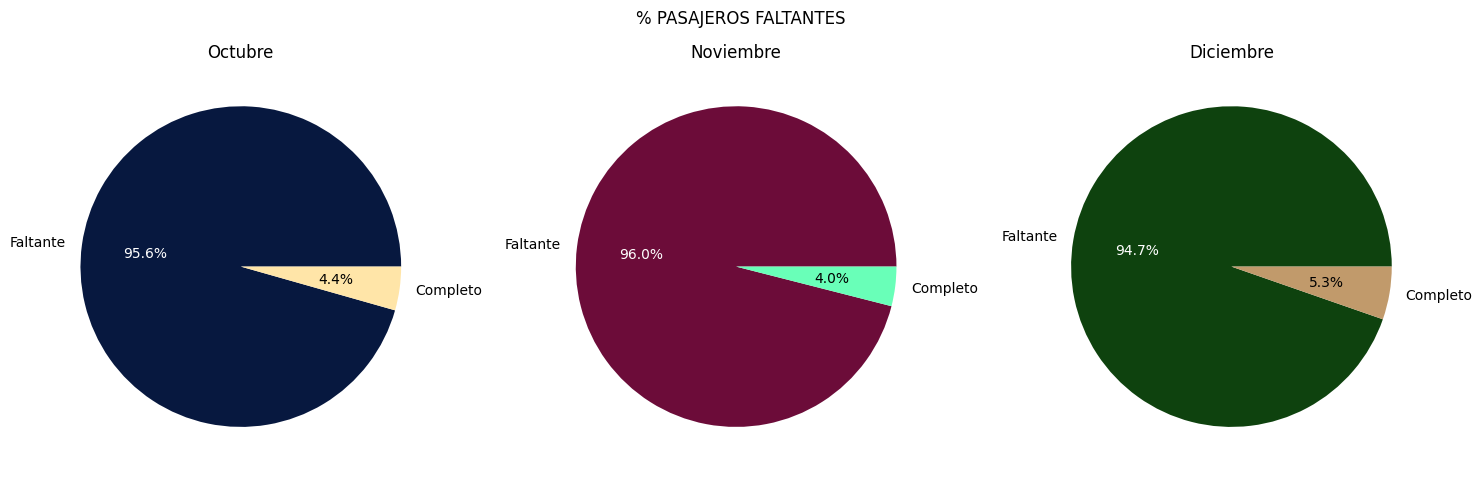

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

na_percentages = trips_oct["passenger_count"].isna().value_counts(normalize=True) * 100
_,_,autotexts = axes[0].pie(na_percentages, labels=["Faltante", "Completo"], autopct='%1.1f%%', colors=['#07183f', '#ffe5a8'])
autotexts[0].set_color('white')
axes[0].set_title("Octubre")


na_percentages = trips_nov["passenger_count"].isna().value_counts(normalize=True) * 100
_,_,autotexts = axes[1].pie(na_percentages, labels=["Faltante", "Completo"], autopct='%1.1f%%', colors=['#6c0c39', '#69ffb8'])
autotexts[0].set_color('white')
axes[1].set_title("Noviembre")

na_percentages = trips_dec["passenger_count"].isna().value_counts(normalize=True) * 100
_,_,autotexts = axes[2].pie(na_percentages, labels=["Faltante", "Completo"], autopct='%1.1f%%', colors=['#0e420e', '#c19a6b'])
autotexts[0].set_color('white')
axes[2].set_title("Diciembre")

plt.suptitle("% PASAJEROS FALTANTES")

plt.tight_layout()


plt.show()

La cantidad de datos faltantes en los DataFrame es de un volumen importante, tenemos tres opciones por tomar:
  1. Eliminamos la fila completa que tiene un valor faltante (NaN)
  2. Eliminamos la columna completa
  3. Establecemos algún valor para esos valores que faltan (cero, la media, la mediana).

Debido a la gran cantidad de datos faltantes para la columna pasajeros, eliminar las filas correspondientes eliminaría mas del 94% de la información para cada DataFrame esta opción no es viable.
Eliminar la columna completa no sería una opción buena, ya que para el contexto de viajes la cantidad de pasajeros es relevante.
Tomamos la opción de establecer un valaor

In [91]:
trips_oct["passenger_count"].describe()

,passenger_count
count,3.367356e+06
mean,1.359726e+00
std,8.768306e-01
min,0.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,9.000000e+00
